In [2]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=False)
sns.set(rc={'figure.figsize':(20,30)})

#import warnings
#warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [4]:
%matplotlib inline

In [5]:
matplotlib.use('TkAgg')

In [6]:
data = pd.read_csv("Downloads/BlackFriday.csv")

In [7]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
#pp.ProfileReport(data)

In [9]:
data['City_Category'].value_counts()

B    226493
C    166446
A    144638
Name: City_Category, dtype: int64

In [10]:
data.mode()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001680,P00265242,M,26-35,4,B,1,0,5,8.0,16.0,6855


In [40]:
data['Age']

0          0-17
1          0-17
2          0-17
3          0-17
4           55+
5         26-35
6         46-50
7         46-50
8         46-50
9         26-35
10        26-35
11        26-35
12        26-35
13        26-35
14        51-55
15        51-55
16        51-55
17        51-55
18        36-45
19        26-35
20        26-35
21        26-35
22        26-35
23        26-35
24        26-35
25        26-35
26        26-35
27        26-35
28        26-35
29        36-45
          ...  
537547    18-25
537548    51-55
537549    51-55
537550    46-50
537551    46-50
537552    46-50
537553    46-50
537554    46-50
537555    46-50
537556    18-25
537557    18-25
537558    18-25
537559    18-25
537560    18-25
537561    18-25
537562    18-25
537563    18-25
537564    18-25
537565    18-25
537566    18-25
537567    18-25
537568    18-25
537569    18-25
537570    18-25
537571    36-45
537572    36-45
537573    36-45
537574    36-45
537575    36-45
537576    36-45
Name: Age, Length: 53757

In [11]:
#profile = pp.ProfileReport(data)
#profile.to_file(outputfile = "Report1.html")

In [12]:
data.shape

(537577, 12)

In [13]:
#returns unique elements @ column
data.nunique()

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      17959
dtype: int64

In [14]:
#data_ = data.replace({'F':'0', 'M':'1'}, inplace = False) 
#data__ = data_.replace({'A' : '1', 'B' : '2' , 'C' : '3'})
#data__.head()


In [15]:
data__1 = data.dropna(subset=['Product_ID', 'Product_Category_1', 'Product_Category_2' ,'Product_Category_3','Stay_In_Current_City_Years', 'City_Category', 'Occupation'])
data__1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,13055


In [16]:
data__2 = data__1.drop(['Product_ID', 'User_ID'], axis = 1)
data__2['Age'].astype('category').cat.as_ordered()
#data__2['Age']
data__2.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,F,51-55,9,A,1,0,2,3.0,4.0,13055


In [17]:
data__6 = data__2.drop(['Product_Category_1','Stay_In_Current_City_Years', 'Gender', 'Marital_Status'], axis = 1)
data__6.head()

,Age,Occupation,City_Category,Product_Category_2,Product_Category_3,Purchase
1,0-17,10,A,6.0,14.0,15200
6,46-50,7,B,8.0,17.0,19215
13,26-35,20,A,2.0,5.0,15665
14,51-55,9,A,8.0,14.0,5378
16,51-55,9,A,3.0,4.0,13055


In [18]:
age_dummies = pd.get_dummies(data__2.Age)

In [19]:
City_Category_dummies = pd.get_dummies(data__2.City_Category) 

In [20]:
Stay_In_Current_City_Years_dummies = pd.get_dummies(data__2.Stay_In_Current_City_Years)

In [21]:
Occupation_dummies = pd.get_dummies(data__2.Occupation)

In [22]:
Product_Category_1_dummies = pd.get_dummies(data__2.Product_Category_1)

In [23]:
Product_Category_2_dummies = pd.get_dummies(data__2.Product_Category_2)

In [24]:
Product_Category_3_dummies = pd.get_dummies(data__2.Product_Category_3)

In [25]:
#age_dummies,City_Category_dummies,Stay_In_Current_City_Years_dummies,Occupation_dummies,Product_Category_1_dummies,Product_Category_2_dummies,Product_Category_3_dummies

## ** UNIVARIATE ANALYSIS

  #### Stay_In_Current_City_Years

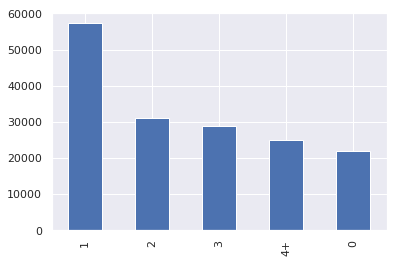

In [18]:
data__2['Stay_In_Current_City_Years'].value_counts().plot.bar()
#data__2['Stay_In_Current_City_Years'].value_counts()

## FINDINGS 
    -Most buyers have lived in the city for one year
    

#### Marital_Status

0    98202
1    66076
Name: Marital_Status, dtype: int64

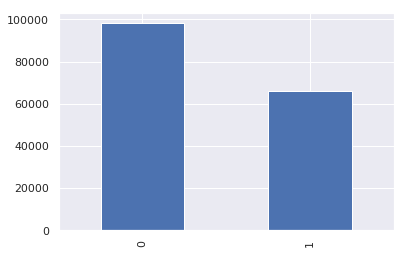

In [30]:
data__2['Marital_Status'].value_counts().plot.bar() 
data__2['Marital_Status'].value_counts()


## Findings
    -Majority are not married

#### City_Category

In [124]:
#data__2['City_Category'].plot.bar() 
#data__2['City_Category'].value_counts()

## Findings

      -Most buyers are from city 2

#### Purchase

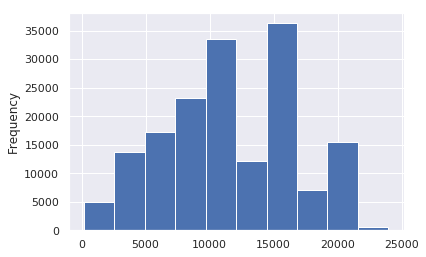

In [23]:
data__2['Purchase'].plot.hist() 


In [127]:
#data__2[data__2['Purchase']==15879]['Purchase']

In [126]:
#data__2['Purchase'].value_counts()

#### Product_Category_1

In [27]:
data__2['Product_Category_1'].unique()

array([ 1,  5,  2,  6,  3,  4,  8, 12, 11, 10, 15, 13])

#### Product_Category_2

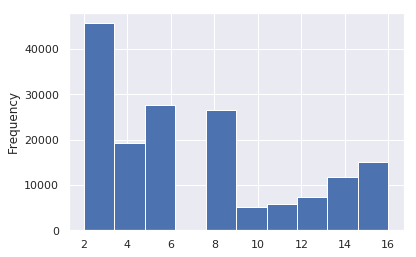

In [25]:
data__2['Product_Category_2'].plot.hist()


#### Product_Category_3

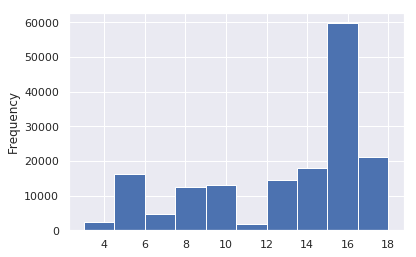

In [26]:
data__2['Product_Category_3'].plot.hist()

#### Age

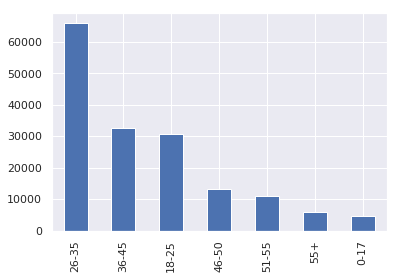

In [30]:
#data__2['Age'].plot.hist() 
data__2['Age'].value_counts().plot.bar()

## Findings
    -Majority of the buyers are in the age bracket 26-35

#### Occupation

4     22076
0     20677
7     17542
17    13844
1     13209
12    10304
20     9080
14     8258
2      7391
16     7194
6      5706
3      4973
10     4268
15     3911
5      3840
11     3234
19     2397
13     2025
18     1968
9      1842
8       539
Name: Occupation, dtype: int64

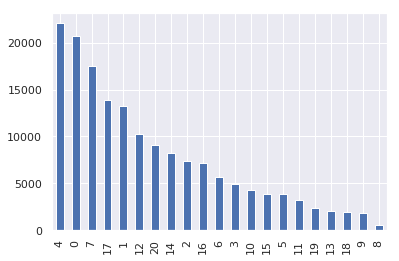

In [37]:
data__2['Occupation'].value_counts().plot.bar() 
data__2['Occupation'].value_counts()

## Findings
    -Most of the buyers have the occupation 4

## Bivariate Analysis

### Pair plots 

In [24]:
#diag_kind='kde' hue = 'continent'

In [129]:
#plt.figure(figsize=(6,4))
#sns.pairplot(data__2)
#color = 'red'


### Coorelation Heatmap

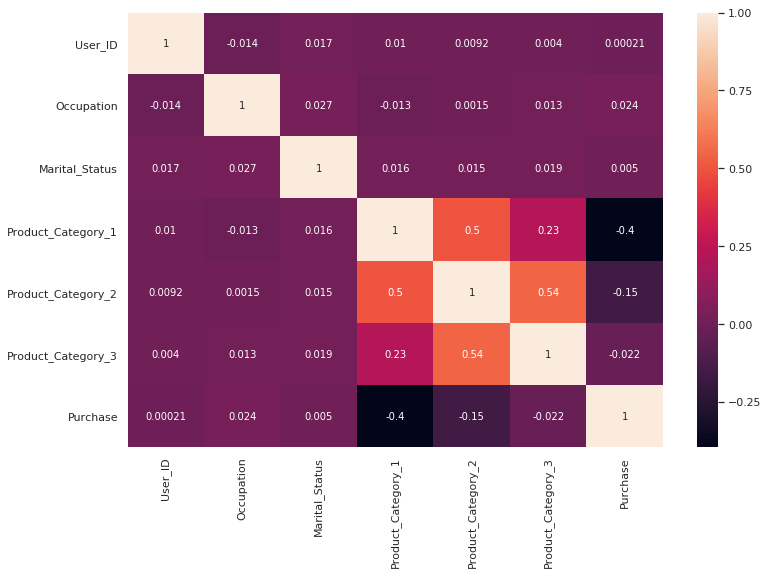

In [19]:
plt.figure(figsize=(12, 8))

data__3 = data__2.corr()
sns.heatmap(data__3, 
            xticklabels = data__3.columns.values,
            yticklabels = data__3.columns.values,
            annot = True);

## Findings
    -Product_cartegory_2 and Product_cartegory_1 have coorelation of 0.5
    -Product_cartegory_2 and Product_cartegory_3 have coorelation of 0.54

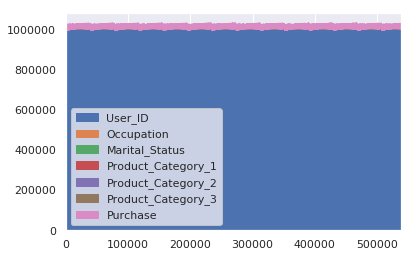

In [41]:
data__2.plot.area()


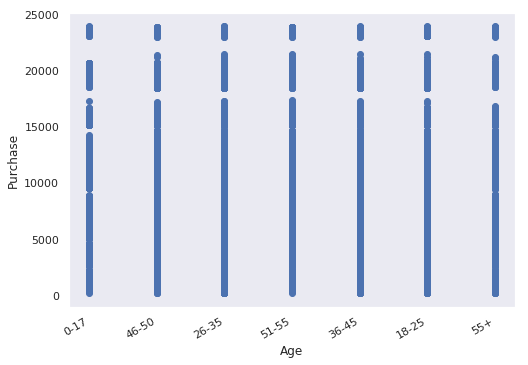

In [42]:
fig = plt.figure(figsize=(8,6))

plt.scatter(data__2['Age'], data__2['Purchase'])
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.grid()
#plt.legend(loc='upper right')

plt.gcf().autofmt_xdate()

plt.show()

## HYPOTHESIS TESTING BY COMPARING VARIOUS COLUMNS IN THE DATA

### -Is a particular age group purchasing a certain product cartegory more than others

<BarContainer object of 164278 artists>

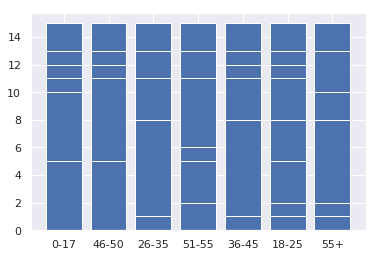

In [26]:
plt.bar(data__2['Age'], data__2['Product_Category_1'])

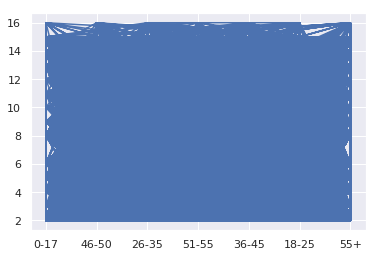

In [27]:
plt.plot(data__2['Age'], data__2['Product_Category_2'])


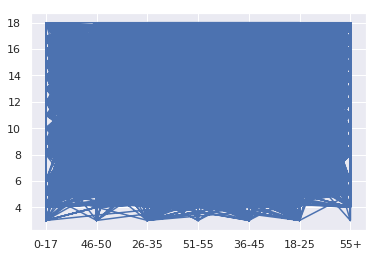

In [28]:
plt.plot(data__2['Age'], data__2['Product_Category_3'])


### Are people of a particular occupation buying a certain Product_Category more, and if so, which one

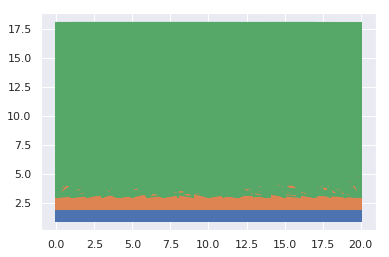

In [44]:
plt.plot(data__2['Occupation'], data__2['Product_Category_1'])
plt.plot(data__2['Occupation'], data__2['Product_Category_2'])
plt.plot(data__2['Occupation'], data__2['Product_Category_3'])



### -Which gender is  buying a certain Product_Category more, and if so, which one

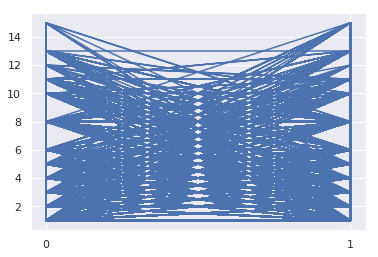

In [45]:
plt.plot(data__2['Gender'], data__2['Product_Category_1'])
#plt.plot(data__2['Gender'], data__2['Product_Category_2'])
#plt.plot(data__2['Gender'], data__2['Product_Category_3'])




### Which product are married people buying alot

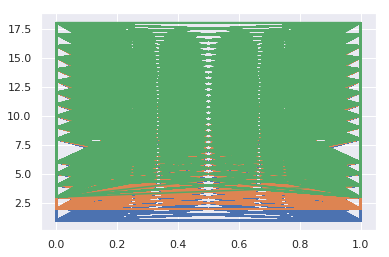

In [46]:
plt.plot(data__2['Marital_Status'], data__2['Product_Category_1'])
plt.plot(data__2['Marital_Status'], data__2['Product_Category_2'])
plt.plot(data__2['Marital_Status'], data__2['Product_Category_3'])

### Which age group purchases alot

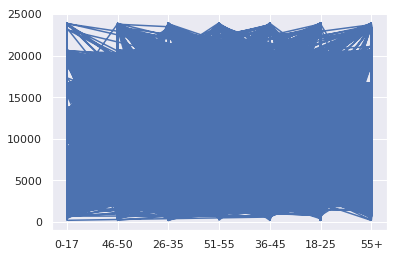

In [47]:
plt.plot(data__2['Age'], data__2['Purchase'])


### Which product_category has a high effect of the purchase

### Which product is being bought by people from diffrent cities

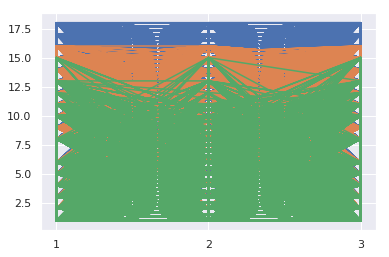

In [48]:
plt.plot(data__2['City_Category'], data__2['Product_Category_3'])
plt.plot(data__2['City_Category'], data__2['Product_Category_2'])
plt.plot(data__2['City_Category'], data__2['Product_Category_1'])



### People from which city purchase alot

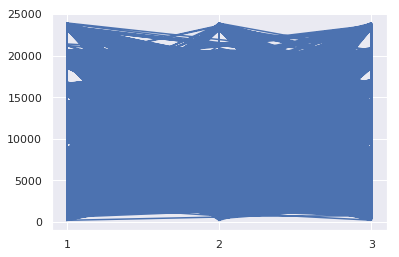

In [49]:
plt.plot(data__2['City_Category'], data__2['Purchase'])
#plt.show()

## Preparation of the model

In [26]:
df = pd.concat([data__6,age_dummies], axis = 1)

#df = pd.concat([data__6,age_dummies,City_Category_dummies], axis = 1)

X = df.drop(['Age','City_Category'], axis = 1)
#Y = pd.get_dummies(data__2.Purchase)
Y = data__2['Purchase'] 
X.head()

,Occupation,Product_Category_2,Product_Category_3,Purchase,0-17,18-25,26-35,36-45,46-50,51-55,55+
1,10,6.0,14.0,15200,1,0,0,0,0,0,0
6,7,8.0,17.0,19215,0,0,0,0,1,0,0
13,20,2.0,5.0,15665,0,0,1,0,0,0,0
14,9,8.0,14.0,5378,0,0,0,0,0,1,0
16,9,3.0,4.0,13055,0,0,0,0,0,1,0


In [27]:
#data__2.dtypes
#data__2 = data__2.convert_objects(convert_numeric=True)
#data__3 = pd.to_numeric(data__2)


#X = data__2.drop(['Purchase', 'Age','Stay_In_Current_City_Years','Product_Category_2', 'City_Category', 'Marital_Status', 'Product_Category_3', 'Product_Category_2','Gender'],axis = 1)
#Y = data__2['Purchase'] 

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  
X_test = sc.fit_transform(X_test)
#Y_train = sc.fit_transform(Y_train)
#Y_test = sc.fit_transform(Y_test)

## Regression plots

/home/tech-iguana/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


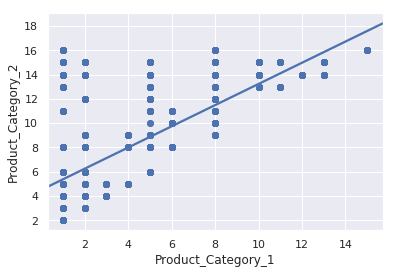

In [66]:
sns.regplot(x = 'Product_Category_1', y = 'Product_Category_2', data = data__2)

/home/tech-iguana/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


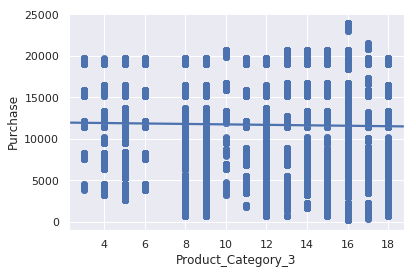

In [65]:
sns.regplot(x = 'Product_Category_3', y = 'Purchase', data = data__2)

/home/tech-iguana/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


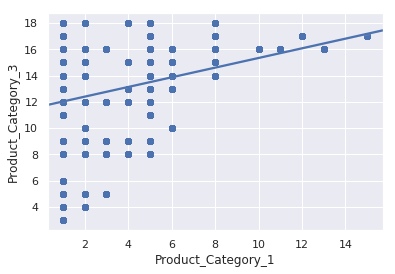

In [24]:
sns.regplot(x = 'Product_Category_1', y = 'Product_Category_3', data = data__2)

In [38]:
sns.regplot(x = 'Marital_Status', y = 'Occupation', data = data__2)

/home/tech-iguana/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [43]:
#Agee = pd.to_numeric('Age')

#sns.regplot(x = 'Age', y = 'Purchase', data = data__2)

### Lets do some Cross Validation on the data

In [30]:
from sklearn.model_selection import  cross_val_score

In [31]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()

In [32]:
print(cross_val_score(lr, X, Y, cv = 3))

[1. 1. 1.]


## Linear Regression Model

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
lr.score(X_test, Y_test)

0.9999449262748521

In [36]:
predictions = lr.predict(X_test)
predictions

array([ 4112.17572263,  6404.34423924, 19175.7092568 , ...,
       15603.93088292, 15552.08981054, 11844.73631489])

In [198]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(X_train, Y_train)
r_value ** 2


ValueError: all the input array dimensions except for the concatenation axis must match exactly

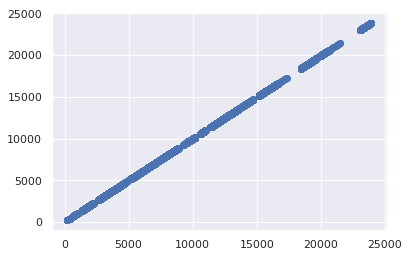

In [33]:
plt.scatter(Y_test, predictions)
#plt.plot(Y_test, predictions, c='r')
#plt.show()

In [253]:
print(lr.intercept_)
print(lr.coef_)

11647.57119087718
[ 0.00000000e+00  4.00573315e-13 -5.83484913e-13  5.07456912e+03
 -3.97646398e+01 -9.14129873e+01 -1.14767045e+02 -9.36399259e+01
 -6.34201795e+01 -5.84971825e+01 -4.33143552e+01 -6.13501545e+01
 -6.99259468e+01 -6.71021901e+01]


## Polynomial Regression Model

In [203]:
from sklearn.preprocessing import PolynomialFeatures

TypeError: 'PolynomialFeatures' object is not callable

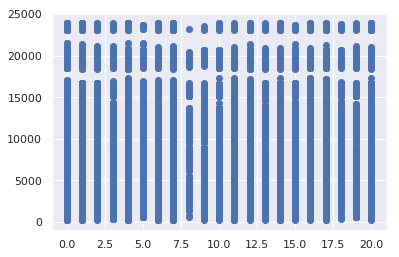

In [207]:
pr = Polynomial(degree=4)
xp = np.linspace(0, 7, 10)
plt.scatter(data__2['Occupation'].values, data__2['Purchase'].values)
plt.plot(xp, pr(xp), c='r')
plt.show()

In [202]:
from sklearn.metrics import r2_score

r2 = r2_score(data__2['Purchase'], pr(data__2['Occupation']))

print(r2)


NameError: name 'pr' is not defined

In [208]:

pr1 = PolynomialFeatures(degree=4)
X_poly = pr1.fit_transform(X_train)
X_test_poly = pr1.transform(Y_train)
#lr.fit(X_poly, Y_train)
lr.predict(X_test)
#lr.score(X_test,Y_test)

MemoryError: 

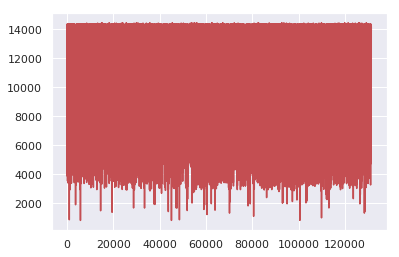

In [139]:
#plt.scatter(X_train, Y_train, color = 'blue')
plt.plot(lr.predict(X_poly), color = 'r')

In [37]:
X_test

array([[-0.94855626, -1.08980455,  0.56690866, ..., -0.29558574,
        -0.26876807, -0.18945979],
       [ 0.58870227, -0.64534829,  0.56690866, ..., -0.29558574,
        -0.26876807, -0.18945979],
       [-0.179927  ,  0.9102486 ,  0.56690866, ..., -0.29558574,
        -0.26876807, -0.18945979],
       ...,
       [-1.25600796,  1.57693299,  1.05244721, ..., -0.29558574,
        -0.26876807, -0.18945979],
       [ 0.58870227,  1.79916112,  0.80967794, ..., -0.29558574,
        -0.26876807, -0.18945979],
       [ 1.20360567, -1.08980455, -1.13247624, ..., -0.29558574,
        -0.26876807, -0.18945979]])